# Multiple linear Regression on Carseats DataSet.

# Importing the libraries.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing the datasets.

In [3]:
df = pd.read_csv('Carseats.csv')
df

,Unnamed: 0,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,5,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,397,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,398,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,399,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
df.shape

(400, 12)

In [5]:
df.head()

,Unnamed: 0,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,5,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [7]:
#dropping Unnamed:0 column
df.drop(df.columns[0],axis = 1,inplace = True)

In [9]:
df.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,Bad,42,17,Yes,Yes
1,111,48,16,260,83,Good,65,10,Yes,Yes
2,113,35,10,269,80,Medium,59,12,Yes,Yes
3,117,100,4,466,97,Medium,55,14,Yes,Yes
4,141,64,3,340,128,Bad,38,13,Yes,No


In [10]:
#check for missing values
df.isnull().sum()

CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [11]:
#check for categorical variables
df.dtypes

CompPrice       int64
Income          int64
Advertising     int64
Population      int64
Price           int64
ShelveLoc      object
Age             int64
Education       int64
Urban          object
US             object
dtype: object

Unique values in ShelveLoc = ['Bad' 'Good' 'Medium']
Unique values in Urban = ['Yes' 'No']
Unique values in US = ['Yes' 'No']


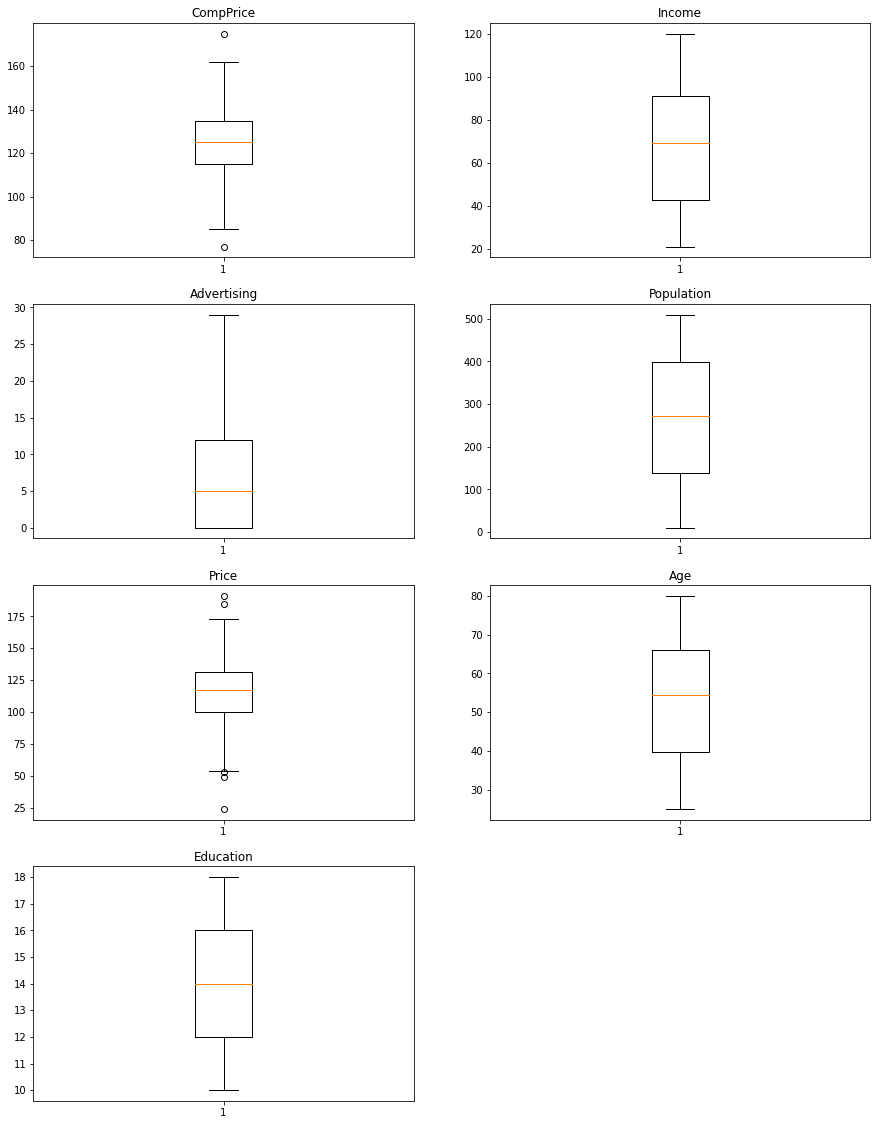

In [12]:
#cheking the unique values in each categorical columns
#also checking for outliers in non categorical columns
plt.figure(figsize = (15,25))
count = 1
for col in df:
    if(df[col].dtype == 'O'):
        print("Unique values in {} = {}".format(col,df[col].unique()))
    else:
        plt.subplot(5,2,count)
        plt.boxplot(df[col])
        plt.title(col)
        count +=1
        
plt.show()

In [13]:
df.corr()

,CompPrice,Income,Advertising,Population,Price,Age,Education
CompPrice,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


In [14]:
df2 = df.copy()
df2['ShelveLoc'].head()

0       Bad
1      Good
2    Medium
3    Medium
4       Bad
Name: ShelveLoc, dtype: object

In [15]:
#applying label encoding on Shelveloc column
my_dict = {
    'Bad':0,
    'Medium':1,
    'Good':2
}
df2['ShelveLoc_new'] = df2['ShelveLoc'].map(my_dict)
df2['ShelveLoc_new'].head()

0    0
1    2
2    1
3    1
4    0
Name: ShelveLoc_new, dtype: int64

In [16]:
#droping old column
df2.drop('ShelveLoc',axis = 1,inplace = True)

In [17]:
#one hot encoding the other two columns and droping the first two rows
df2 = pd.get_dummies(df2,drop_first=True)

In [18]:
df2.corr()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_new,Urban_Yes,US_Yes
CompPrice,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197,0.038549,0.066594,0.016869
Income,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855,-0.053465,0.037967,0.089601
Advertising,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594,0.056552,0.042035,0.684460
Population,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378,-0.020614,-0.052025,0.060564
Price,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747,0.050924,0.047016,0.057861
Age,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488,0.014149,0.028479,0.008652
Education,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000,-0.025723,-0.033094,-0.078250
ShelveLoc_new,0.038549,-0.053465,0.056552,-0.020614,0.050924,0.014149,-0.025723,1.000000,-0.075404,0.047378
Urban_Yes,0.066594,0.037967,0.042035,-0.052025,0.047016,0.028479,-0.033094,-0.075404,1.000000,0.047085
US_Yes,0.016869,0.089601,0.684460,0.060564,0.057861,0.008652,-0.078250,0.047378,0.047085,1.000000


In [19]:
df2.dtypes

CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
Age              int64
Education        int64
ShelveLoc_new    int64
Urban_Yes        uint8
US_Yes           uint8
dtype: object

In [20]:
#split X and y
X = df2.iloc[:,1:].values
y = df2.iloc[:,0].values

In [21]:
X.shape

(400, 9)

In [22]:
y.shape

(400,)

In [23]:
y = y.reshape(-1,1)

In [24]:
#splitting into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

In [25]:
#creating linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [26]:
#fitting the training data
model.fit(X_train,y_train)

LinearRegression()

In [29]:
#Predictions
y_pred = model.predict(X_test)

In [30]:
#checking the r2score
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.3909149969097869